### <center> 2019 CyberGIS AAG-UCGIS Summer School - Group 5 </center>
# <center> A Reproducible and Replicable Spatially Explicit Agent-Based Model Using CyberGIS-Jupyter: A Case Study in Queen Anne Neighborhood, Seattle, WA </center> 

<br>
<center><b>Members: Alexander Michels<sup>a</sup>, Angie Werner<sup>b</sup>, Brandon Lieberthal<sup>c</sup>, Changzhen Wang<sup>d</sup>, Mishka Vance<sup>e</sup>, Li Yi<sup>f</sup> </b></center>

<center> <b>Mentor: Jeon-Young Kang<sup>g</sup> </b></center>

<sup font-size: smaller> <sup>a</sup> Mathematics and computational analysis, University of Illinois Urbana-Champaign<br>
<sup>b</sup> Environmental health and epidemiology, National Environmental Public Health Tracking Program, Centers for Disease Control and Prevention<br>
<sup>c</sup> Spatial analysis and geovisualization, University of Maine<br>
<sup>d</sup> Geography, Louisiana State University<br>
<sup>e</sup> Human geography, Hunter College<br>
<sup>f</sup> Spatial analysis and modeling, geovisualization, University of Southern California<br>
<sup>g</sup> Spatially explicit agent-based modeling, University of Illinois Urbana-Champaign<br> </sup>

## Introduction

Influenza is a contagious respiratory illness caused by influenza viruses. The flu is spread from person to person, often by droplets when those who are infected cough, sneeze, or talk. Sometimes people can be infected by touching a surface that has the virus on it, although this is not as common. Symptoms include fever, cough, sore throat, muscle aches, headaches, and fatigue. Influenza has a high burden of disease despite vaccination and public health policies that have been implemented. The CDC estimates that more than 900,000 people were hospitalized and over 80,000 people died from the flu in the 2017-2018 season (CDC, 2018).

Spatial simulation modeling (also known as agent-based modeling or ABM) serves as a tool to simulate and capture various spatiotemporal phenomena. ABM can be used to explore the epidemiology and spread of certain diseases such as influenza. The phenomena being modeled are the results from dynamic interactions and behaviors of individual agents and the environments. The modeling process, however, is not always simple—it requires the conceptualization and understanding of the spatiotemporal process at an individual level. An ABM has several key components, including its agents, properties, environment, and rules, which specify how the agents interact and what happens when they interact. This work will apply a spatially explicit ABM to simulate influenza spread.

## Research Question
To what degree can a spatially explicit agent-based model simulate influenza spread in the Queen Anne neighborhood in Seattle, Washington?


## Main Objectives  
1. To conceptualize a spatiotemporal phenomenon: influenza transmission
2. To capture and simulate the influenza transmission process
3. To explore the spatiotemporal patterns of influenza outbreaks

## Workflow

<img src="img/WorkFlow.png">

## Table of Contents
* [Load (or Find) Your Data](#data)
* [Synthesize a Population](#synthesize)
* [Simulation](#simulation)
* [Visualization](#vis)
* [Contributions to Reproducibility and Replicability](#RR)
* [Future Work](#future)
* [References](#ref)

### 1. Find the Data

1.1 Geographic data

The geographic data of households/workplaces/schools were obtained from the [City of Seattle Open Data Hub](https://data.seattle.gov). Then, the data were extracted based on the zoning types that overlay the building footprints. The [building footprint](https://data.seattle.gov/Land-Base/Building-Outlines-2015/xyar-5y9i) and [zoning data](https://data.seattle.gov/dataset/Zoning-Detailed-/tu7p-5agf) can be downloaded by clicking the respective links.<br><br>

1.2 Neighborhood selection

For this workshop, we have selected Queen Anne neighborhood in Seattle as a use case example, and datasets were subsetted by choosing x and y limits (in UTM 10N coordinate system) of the Queen Anne neighborhood.

> xmin = 546302; xmax = 549610; ymin = 5274394; ymax = 5277978; <br>
nhouses_old = len(houses);
houses = houses[(houses.X >= xmin) & (houses.X <= xmax) & (houses.Y >= ymin) & (houses.Y <= ymax)];
nhouses_new = len(houses);
print(nhouses_new," of ",nhouses_old," houses were selected.") <br>

<img src="img/queenanne_seattle.png"> 


1.3 Human agents

Interactions between the human agents and their environments (attributes and methods) are included in the Human.py and Env.py programs. The datasets needed for this include population distribution and household size. All of these datasets are at the block group level (specific to Queen Anne neighborhood) and were obtained from the American Community Survey for 2013-2017 5-year estimates.

[Population distribution data - Table B01001 - Sex by Age](https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=ACS_17_5YR_B01001&prodType=table)

[Household size data - Table B11016 - Household Type by Household Size](https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=ACS_17_5YR_B11016&prodType=table)

These data were joined to the Queen Anne neighborhood block groups in order to calculate the weights for population distribution and household size across the entire neighborhood. Age groups were applied using standard 5-year age groups across 18 categories (e.g., starting with 0-4 and ending with 85+). Household size used only family households (i.e., excluded non-family households) and used six categories (size 2, size 3, size 4, size 5, and size 6 or more).

1.4 Influenza data

Influenza data were obtained from the 2018-2019 Weekly Flu Surveillance Reports from the Seattle & King County Department of Public Health. The starting week used was October 7 - 13 2018 and the ending week used was April 28 - May 4 2019. All weekly data were used in this time period to sum the total influenza cases (e.g., summing influenza A cases, influenza B cases, etc.) over time. These data are used to generate a plot of reference data against which to compare the results of the simulation. 

[Influenza data](https://www.kingcounty.gov/depts/health/communicable-diseases/disease-control/influenza.aspx)

1.5 Additional data

Race and median household income data were also obtained from the American Community Survey (2013-2017 5-year estimates) for the Queen Anne neighborhood block groups. This information was used for visual analysis to examine the distribution of influenza cases in relation to different sociodemographic characteristics.

[Race data - Table B02001 - Race](https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=ACS_17_5YR_B02001&prodType=table)

[Median household income data - Table B19013 - Median household income in the past 12 months](https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=ACS_17_5YR_B19013&prodType=table)


### 2. Synthesize a Population 
2.1 The locations of households, schools, and workplaces are obtained by overlaying building footprints data with zoning data (e.g., residential, commercial, educational). <br>
2.2 Age distributions and the composition of households are _**synthesized**_ as similar to American Community Survey (ACS) 2013-17 5-year estimates data (see Find the Data Section for more information). <br>
2.3 Individual humans have age and age-dependent daily behaviors (e.g., commuting to schools (aged 6 to 19) and workplaces (aged 20 to 64), and staying at home all day (the rest of people)).

### 3. Simulate a Flu Season
3.1 A random sample of people get infected at the beginning of the simulation. <br>
3.2 The disease process is explained through a susceptible-exposed-infectious-recovered (SEIR) model. <br>
3.3 An individual human can spread influenza to his/her classmates/co-workers and household members.

### 4. Analyze and Visualize
4.1 The model output will be saved as 'results.csv' file. <br>
4.2 The file consists of three columns, including 'time', 'x-coordinate', and 'y-coordinate' of influenza outbreaks.

### Codes

Import necessary libraries to run this model.

In [4]:
!pip install --user folium

In [33]:
import numpy as np
import folium, itertools, math, pickle, random, time
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib.image as mpimg
import matplotlib.animation as animation
from os import path

from pyproj import Proj, transform

import os
os.environ["PROJ_LIB"] = '/opt/conda/envs/python2/share/proj'

In [34]:
import Env
import Human

Import python codes containing the classes and functions for environment and human behaviors.

<a name="data"></a>
## Load (or Find) Your Data

Files of households, workplaces, and schools for the Queen Anne neighborhood are imported.

Choose x and y limits (in UTM) and filter houses to select those in the Queen Anne neighborhood.

In [35]:
# Files of households, workplaces, and schools are imported.
CITY = "QueenAnne" # name of the city you're loading data for
houses = pd.read_csv('./data/{}/houses_points.csv'.format(CITY))
schools = pd.read_csv('./data/{}/schools_points.csv'.format(CITY))
works = pd.read_csv('./data/{}/works_points.csv'.format(CITY))

# Choose x and y limits (in UTM) and filter houses
xmin = 546302;
xmax = 549610;
ymin = 5274394;
ymax = 5277978;
nhouses_old = len(houses);
houses = houses[(houses.X >= xmin) & (houses.X <= xmax) & (houses.Y >= ymin) & (houses.Y <= ymax)];
nhouses_new = len(houses);
print(nhouses_new," of ",nhouses_old," houses filtered.")

16755  of  391992  houses filtered.


Inspect first five rows of the house, school, and workplace datasets, then create figures to plot the house, school, and workplace datasets.

In [36]:
house_cat = houses.DESCR.unique().tolist() # Obtain the type of households
house_dict = {}
rd_color =["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) 
                 for i in range(len(house_cat))]  # generated random color based on the types of households
for i in range(len(house_cat)):    
    houses.loc[houses['DESCR'] == house_cat[i], 'color'] = rd_color[i]   # set value for color column
    house_dict[house_cat[i]] = rd_color[i]
housemyProj = Proj("+proj=utm +zone=10N, +north +ellps=WGS84 +datum=WGS84 +units=m +no_defs")
houselonlat = housemyProj(houses['X'].values.tolist(), houses['Y'].values.tolist(), inverse=True)
houses['lat'] = houselonlat[1]
houses['lon'] = houselonlat[0]
houses.head()

,houseID,DESCR,X,Y,Shape_Length,Shape_Area,color,lat,lon
0,14,Multi-Family,546383.0609,5277176.021,39.147069,90.045604,#44B222,47.646319,-122.382414
1,15,Multi-Family,546332.4273,5277159.527,38.950530,84.198371,#44B222,47.646174,-122.383090
2,16,Multi-Family,546357.1243,5277185.342,46.210541,117.874763,#44B222,47.646405,-122.382758
7,21,Multi-Family,546384.6356,5277268.185,72.561298,259.678237,#44B222,47.647148,-122.382383
15,77,Multi-Family,546349.0929,5277102.132,53.187976,151.622510,#44B222,47.645657,-122.382874


In [37]:
school_cat = schools.CODE.unique().tolist() # Obtain the type of schools
school_dict = {}
rd_color =["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) 
                 for i in range(len(school_cat))]   # generate random color based on the types of schools
for i in range(len(school_cat)):    
    schools.loc[schools['CODE'] == school_cat[i], 'color'] = rd_color[i]   # set value for color column
    school_dict[school_cat[i]] = rd_color[i]
    
schoolmyProj = Proj("+proj=utm +zone=10N, +north +ellps=WGS84 +datum=WGS84 +units=m +no_defs")
schoollonlat = schoolmyProj(schools['X'].values.tolist(), schools['Y'].values.tolist(), inverse=True)
schools['lat'] = schoollonlat[1]
schools['lon'] = schoollonlat[0]
schools.head()

,schoolID,CODE,NAME,ABB_NAME,X,Y,color,lat,lon
0,1,College or University,Cornish College of the Arts,Cornish College,549874.0518,5274074.670,#B65EF2,47.618156,-122.336288
1,2,Elementary,St. Paul School,St. Paul,555512.6343,5262151.157,#916732,47.510420,-122.262764
2,3,Elementary,Amazing Grace Christian School,Amazing Grace,555738.5532,5262203.525,#916732,47.510872,-122.259758
3,4,Elementary,St. Anne School,St. Anne,548220.3227,5275499.850,#916732,47.631104,-122.358137
4,5,Elementary,Lowell Elementary School,Lowell,551216.9704,5274783.294,#916732,47.624427,-122.318335


In [38]:
work_cat = works.DESCR.unique().tolist() # obtain the type of workplaces
work_dict = {}
rd_color =["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(len(work_cat))]  # generate random color based on the types of workplaces
for i in range(len(work_cat)):    
    works.loc[works['DESCR'] == work_cat[i], 'color'] = rd_color[i]   # set value for color column
    work_dict[work_cat[i]] = rd_color[i]
    
workmyProj = Proj("+proj=utm +zone=10N, +north +ellps=WGS84 +datum=WGS84 +units=m +no_defs")
worklonlat = workmyProj(works['X'].values.tolist(), works['Y'].values.tolist(), inverse=True)
works['lat'] = worklonlat[1]
works['lon'] = worklonlat[0]
works.head()

,workID,DESCR,X,Y,Shape_Length,Shape_Area,color,lat,lon
0,1,Commercial/Mixed Use,545239.5425,5279310.598,20.764958,28.055354,#9E56A2,47.665605,-122.397418
1,2,Manufacturing/Industrial,546827.6875,5278198.516,38.236831,80.410245,#5249AE,47.655487,-122.376385
2,3,Commercial/Mixed Use,546775.8362,5277486.733,81.645021,338.953912,#9E56A2,47.649086,-122.377151
3,4,Commercial/Mixed Use,546778.9302,5277470.385,110.783883,499.581222,#9E56A2,47.648939,-122.377112
4,5,Commercial/Mixed Use,546779.4392,5277502.181,91.714040,403.465279,#9E56A2,47.649225,-122.377102


In [39]:
# count the number by house types
for key,value in house_dict.items():
    sub_houses = houses[houses.DESCR == key]
    print("The number of", key, "households is ",len(sub_houses)) # counting the number of houeholds

print("The number of households in total:", len(houses)) # counting the number of households

The number of Multi-Family households is  5282
The number of Single Family households is  11473
The number of households in total: 16755


#### Codes to produce the interactive map for houses and save the map as a .html
>m = folium.Map(location=[47.638972, -122.361579], tiles='cartodbpositron', zoom_start=14) 
for i in range(0, len(houses)):
   folium.CircleMarker(
      location=[houses.iloc[i]['lat'], houses.iloc[i]['lon']],
      popup=houses.iloc[i]['DESCR'],
      radius=2,
      color='grey',
      weight=0.1,
      fill=True,
      fill_color=houses.iloc[i]['color'],
      fill_opacity=0.6,
      legend_name = 'Number of incidents per district'
   ).add_to(m)
legend_html =   '''<div style="position: fixed; width: auto; heigh: auto;
                            bottom: 10px; left: 10px;
                            solid grey; z-index:9999; font-size:14px;
                            ">&nbsp; Legend<br>'''
color_leg = ""
for key, value in house_dict.items():
    color_leg += '&nbsp; <i class="fa fa-circle" style="font-size:10px; color: '+ value + '"></i>' +'&nbsp;'
    color_leg += key + '<br>'
legend_html += color_leg + '</div>'''
m.get_root().html.add_child(folium.Element(legend_html))
m.save('maps/houses_interactive_map.html')

In [55]:
# display the interactive map for houses

from IPython.display import IFrame

IFrame(src='maps/houses_interactive_map.html', width=900, height=700)

In [56]:
# count the number by school types
for key,value in school_dict.items():
    sub_schools = schools[schools.CODE == key]
    print("The number of", key, "schools is ",len(sub_schools)) # counting the number of schools

print("The number of schools in total:", len(schools)) # counting the number of schools

The number of College or University schools is  13
The number of Elementary schools is  103
The number of High schools is  22
The number of Alternative schools is  24
The number of Junior High/Middle schools is  18
The number of Other Facility schools is  2
The number of K-12 schools is  1
The number of schools in total: 183


#### Codes to produce the interactive map for schools and save the map as a .html
>m = folium.Map(location=[47.638972, -122.361579], tiles='cartodbpositron', zoom_start=14) 
for i in range(0, len(schools)):
   folium.CircleMarker(
      location=[schools.iloc[i]['lat'], schools.iloc[i]['lon']],
      popup=schools.iloc[i]['NAME'],
      radius=5,
      color='grey',
      weight=0.1,
      fill=True,
      fill_color=schools.iloc[i]['color'],
      fill_opacity=0.6,
      legend_name = 'Number of incidents per district'
   ).add_to(m)<br>
legend_html =   '''<div style="position: fixed; width: 20%; heigh: auto;
                            bottom: 10px; left: 10px;
                            solid grey; z-index:9999; font-size:14px;
                            ">&nbsp; Legend<br>'''
color_leg = ""
for key, value in school_dict.items():
    color_leg += '&nbsp; <i class="fa fa-circle" style="font-size:10px;color: '+ value + '"></i>' +'&nbsp;'
    color_leg += key + '<br>'
legend_html += color_leg + '</div>'''
m.get_root().html.add_child(folium.Element(legend_html))
m.save('maps/schools_interactive_map.html')

In [57]:
# display the interactive map
from IPython.display import IFrame

IFrame(src='maps/schools_interactive_map.html', width=900, height=700)

In [58]:
# count the number by workplace types
for key, value in work_dict.items():
    sub_works = works[works.DESCR == key]
    print("The number of", key, "workplace is ",len(sub_works)) # counting the number of schools
print("The number of workplace in total:", len(works)) # counting the number of schools

The number of Commercial/Mixed Use workplace is  15040
The number of Manufacturing/Industrial workplace is  6066
The number of Downtown workplace is  1672
The number of workplace in total: 22778


#### Codes to produce the interactive map for workplaces and save the map as a .html
>m = folium.Map(location=[47.638972, -122.361579], tiles='cartodbpositron', zoom_start=14) 
for i in range(0, len(works)):
   folium.CircleMarker(
      location=[works.iloc[i]['lat'], works.iloc[i]['lon']],
      popup=works.iloc[i]['DESCR'],
      radius=2,
      color='grey',
      weight=0.1,
      fill=True,
      fill_color=works.iloc[i]['color'],
      fill_opacity=0.6 
   ).add_to(m)
legend_html =   '''<div style="position: fixed; width: 23%; heigh: auto;
                            bottom: 10px; left: 10px;
                            solid grey; z-index:9999; font-size:14px;
                            ">&nbsp; Legend<br>'''
color_leg = ""
for key, value in work_dict.items():
    color_leg += '&nbsp; <i class="fa fa-circle" style="font-size:10px;color: '+ value + '"></i>' +'&nbsp;'
    color_leg += key + '<br>'
legend_html += color_leg + '</div>'''
m.get_root().html.add_child(folium.Element(legend_html))
m.save('maps/works_interactive_map.html')

In [59]:
# display the interactive map
from IPython.display import IFrame
IFrame(src='maps/works_interactive_map.html', width=900, height=700)

Before running the simulation, the environments (schools, workplaces, households) and individual human agents needs to be set up. <br> 
The functions of _settingSchools ()_, _settingWorks()_, and _settingHouseholds()_ are included in _Env.py_. <br> 
The function of _settingHumanAgent()_ is included in _Human.py_.

<a name="synthesize"></a>
## Synthesize a Population

In [17]:
try: # try to open the preprocessed data
    with open("data/{}/schoolList.pickle".format(CITY), "rb") as f:
        schoolList = pickle.load(f)
    print("...loaded school data from pickle...")
except: # if data does not exist, write it
    schoolList = Env.settingSchools('./data/{}'.format(CITY))
    with open("data/{}/schoolList.pickle".format(CITY), "wb") as f:
        pickle.dump(schoolList, f)
try:
    with open("data/{}/workList.pickle".format(CITY), "rb") as f:
        workList = pickle.load(f)
    print("...loaded work list from pickle...")
except:
    workList = Env.settingWorks('./data/{}'.format(CITY))
    with open("data/{}/workList.pickle".format(CITY), "wb") as f:
        pickle.dump(workList, f)
try:
    with open("data/{}/houseList.pickle".format(CITY), "rb") as f:
        houseList = pickle.load(f)
    print("...loaded house list from pickle...")
except:
    houseList = Env.settingHouseholds('./data/{}'.format(CITY), schoolList, workList, houses = houses)
    with open("data/{}/houseList.pickle".format(CITY), "wb") as f:
        pickle.dump(houseList, f)
try:
    with open("data/{}/peopleList.pickle".format(CITY), "rb") as f:
        peopleList = pickle.load(f)
    print("...loaded people list from pickle...")
except:
    peopleList = Human.settingHumanAgent(houseList)
    with open("data/{}/peopleList.pickle".format(CITY), "wb") as f:
        pickle.dump(peopleList, f)

...loaded school data from pickle...
...loaded work list from pickle...
...loaded house list from pickle...
...loaded people list from pickle...


Inspect the age distribution of the human agents.

Total population: 33648


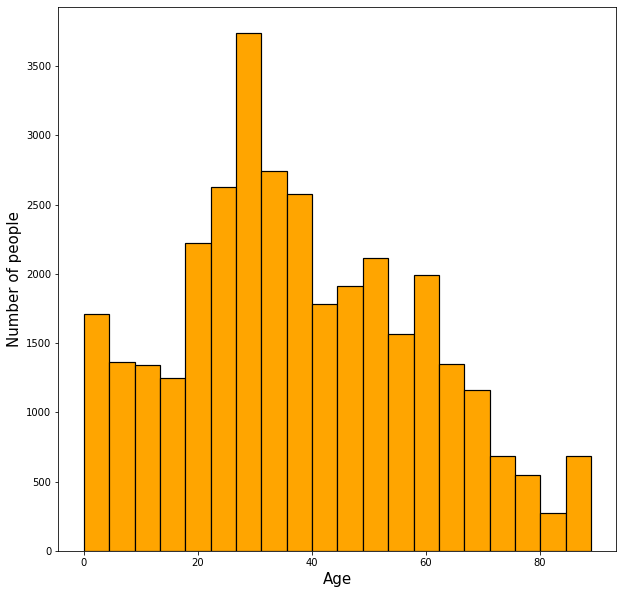

In [18]:
# make a histogram for age distributions of human agents
age = [peopleList[i].age for i in range(0,len(peopleList))] # make a list for people's age
plt.figure(figsize=(10,10))
plt.hist(age, bins=20, color='orange', edgecolor='black', linewidth=1.2)
plt.xlabel("Age", size=15)
plt.ylabel("Number of people", size=15)
print("Total population:", len(peopleList))

### Visualizing the Contact Network

We are working with a very large simulated data set that networkx is incapable of visualizing, but it is able to visualize subsets (or rather subgraphs)! We have provided two ways to subset your graphs, randomly subsampling by person ID and by taking all people in a geographic subset of our study area.

To help ease the computational strain on networkx, we are using something called a *line graph* rather than a graph. A *line graph* of an undirected graph G, is a graph that represents the adjacencies between the edges of G. In our case, this means instead of the nodes being people and the edges being places they visit, the nodes are places and the edges are people that visit both places. Because of our model assumptions that people are tied to their houses, schools, and places of work, a line graph reduces the graph while preserving all connectivity information.

This is the line graph for Queen Anne by randomly selecting every 10th person:

![Graph here](img/GraphRandomSubsample.png)

This is the line graph for Queen Anne by taking a geographic subset (people within the bounding box x in (547,956 - 548,783) and y in (5,277,186 - 5,277,082))

![Graph here](img/GraphGeosample.png)

### Initial settings of the ABM model

1. introRate: the number of people who are randomized as exposed at the beginning of the simulation.

2. reproduction: the expected average number of secondary infection cases taking place per a single infection case.

3. infRate: the probability that an individual human becomes infectious when he/she contacts an infectious person.

4. days: the duration for the simulation to be run. 

_Attention!!!_ Now, this model is assumed to be run for 30 days, but to be fully completed, the days parameter should be 155. 

In [19]:
import ipywidgets as widgets
introRateW = widgets.IntSlider(min=0,max=10,value=5, description="introRate")
reproW = widgets.FloatSlider(min=0, max=5, step=0.1,value=2.4, description="reproduction")
infW = widgets.FloatSlider(min=0, max=1, step=.01, value=0.18, description="infRate")
daysW = widgets.IntSlider(min=0, max=155, value = 30, description="days")
display(introRateW, reproW, infW, daysW)

IntSlider(value=5, description='introRate', max=10)

FloatSlider(value=2.4, description='reproduction', max=5.0)

FloatSlider(value=0.18, description='infRate', max=1.0, step=0.01)

IntSlider(value=30, description='days', max=155)

In [20]:
introRate = float(introRateW.value)/10000.0
reproduction = reproW.value
infRate = infW.value
days = daysW.value # the list for counting infectious people over simulation days.

#initial infections based on the introRate
peopleList = Env.initialInfection(peopleList, introRate)

<a name="simulation"></a>
### Processes of the ABM model

1. **for loop** was used to set up simulation perods.
2. During each day, susceptible humans have a chance to be exposed to Influenza by infectious humans.
3. The exposed humans were assumed to become infectious after an incubation period (3 days).
4. The infected humans were assumed to recover after an infectious period (7 days).

In [21]:
from tqdm.notebook import tqdm
total_simulation_time=0
infectiousCount=[]
exposedX = []
exposedY = []
exposedT = []

for t in tqdm(range(1,days), desc="Time Steps"):
    start = time.time()
    susceptibleList=[]
    exposedList=[]
    infectiousList=[]
    recoveredList=[]
    for p in tqdm(range(0,len(peopleList)), desc="Update States", leave=False):
        person = peopleList[p]
        person.incubating()
        person.recovering()
       
        if (person.S==True):
            susceptibleList.append(person)
        if (person.E==True):
            exposedList.append(person)
        if (person.I==True):
            infectiousList.append(person)
        if (person.R==True):
            recoveredList.append(person)
            if (person.recT is None):
                person.recT = t;
        if (person.infT==t):
            exposedX.append(person.infX)
            exposedY.append(person.infY)
            exposedT.append(person.infT)
            
    infectiousCount.append(len(infectiousList))
    
    for p in tqdm(peopleList, desc="Infection", leave=False):
        p.infecting(peopleList, infRate, reproduction, t) #infecting function is included in Human.py
        
    iteration_time = time.time()-start
    total_simulation_time+=iteration_time
    print("Simulation Day: {:3d},  Remaining Days: {:3d},  # of infectious people: {:5d}  took  {:4.2f} seconds".format(t, days-t,len(exposedList),iteration_time))
    

total_simulation_time/=60.0 # get minutes
hours = False
daysBool = False
if total_simulation_time >= 60:
    total_simulation_time/=60.0 # get hours
    hours = True
    if total_simulation_time >= 24:
        total_simulation_time/=24.0
        daysBool = True
        
if not (hours and days):
    print("\n\n Total Simulation Time: {:.1f} minutes.".format(total_simulation_time))
elif not daysBool:
    print("\n\n Total Simulation Time: {:.1f} hours.".format(total_simulation_time))
else:
    print("\n\n Total Simulation Time: {:.1f} days.".format(total_simulation_time))

Simulation Day:   1,  Remaining Days:  29,  # of infectious people:     8  took  0.24 seconds


Simulation Day:   2,  Remaining Days:  28,  # of infectious people:     9  took  0.26 seconds


Simulation Day:   3,  Remaining Days:  27,  # of infectious people:     4  took  0.27 seconds


Simulation Day:   4,  Remaining Days:  26,  # of infectious people:     6  took  0.34 seconds


Simulation Day:   5,  Remaining Days:  25,  # of infectious people:    11  took  0.27 seconds


Simulation Day:   6,  Remaining Days:  24,  # of infectious people:    10  took  0.31 seconds


Simulation Day:   7,  Remaining Days:  23,  # of infectious people:     6  took  0.37 seconds


Simulation Day:   8,  Remaining Days:  22,  # of infectious people:     8  took  0.27 seconds


Simulation Day:   9,  Remaining Days:  21,  # of infectious people:     7  took  0.36 seconds


Simulation Day:  10,  Remaining Days:  20,  # of infectious people:     8  took  0.39 seconds


Simulation Day:  11,  Remaining Days:  19,  # of infectious people:    10  took  0.41 seconds


Simulation Day:  12,  Remaining Days:  18,  # of infectious people:    17  took  0.41 seconds


Simulation Day:  13,  Remaining Days:  17,  # of infectious people:    18  took  0.45 seconds


Simulation Day:  14,  Remaining Days:  16,  # of infectious people:    20  took  0.36 seconds


Simulation Day:  15,  Remaining Days:  15,  # of infectious people:    15  took  0.45 seconds


Simulation Day:  16,  Remaining Days:  14,  # of infectious people:    27  took  0.34 seconds


Simulation Day:  17,  Remaining Days:  13,  # of infectious people:    24  took  0.49 seconds


Simulation Day:  18,  Remaining Days:  12,  # of infectious people:    24  took  0.54 seconds


Simulation Day:  19,  Remaining Days:  11,  # of infectious people:    26  took  0.65 seconds


Simulation Day:  20,  Remaining Days:  10,  # of infectious people:    32  took  0.48 seconds


Simulation Day:  21,  Remaining Days:   9,  # of infectious people:    28  took  0.69 seconds


Simulation Day:  22,  Remaining Days:   8,  # of infectious people:    33  took  0.90 seconds


Simulation Day:  23,  Remaining Days:   7,  # of infectious people:    39  took  0.90 seconds


Simulation Day:  24,  Remaining Days:   6,  # of infectious people:    44  took  0.89 seconds


Simulation Day:  25,  Remaining Days:   5,  # of infectious people:    57  took  0.88 seconds


Simulation Day:  26,  Remaining Days:   4,  # of infectious people:    64  took  0.92 seconds


Simulation Day:  27,  Remaining Days:   3,  # of infectious people:    76  took  0.87 seconds


Simulation Day:  28,  Remaining Days:   2,  # of infectious people:    75  took  1.01 seconds


Simulation Day:  29,  Remaining Days:   1,  # of infectious people:    74  took  1.22 seconds



 Total Simulation Time: 0.3 minutes.


This saves the simulation results to a .csv file to test for stochasticity later. Each time the simulation is run, every function starting with "Synthesize a Population" must be rerun.

<a name="vis"></a>
## Visualization

Text(0, 0.5, 'Number of people')

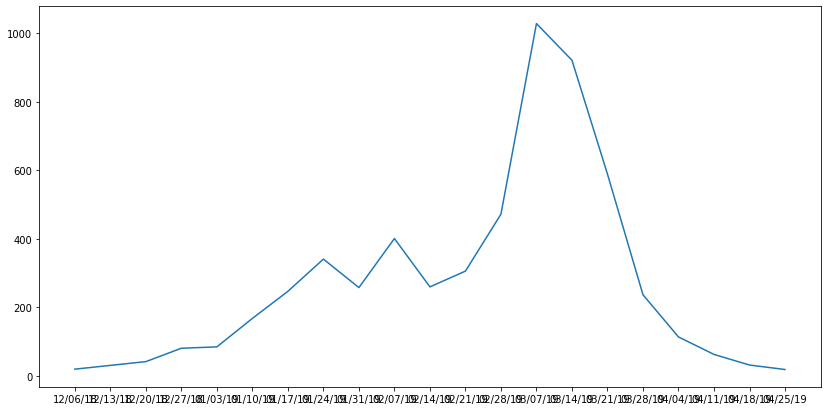

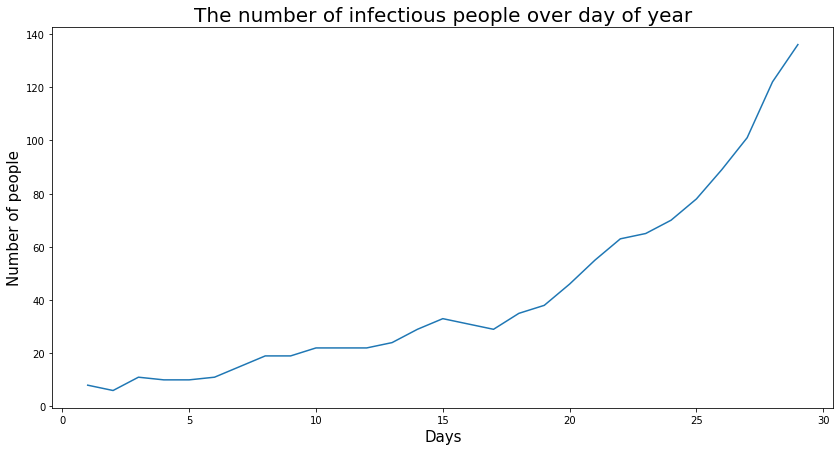

In [22]:
## Visualization of the simulated flu cases
realdata = pd.read_csv('./data/{}/fludata.csv'.format(CITY))
plt.figure(figsize=(14,7))
plt.plot(realdata['Date'], realdata['Positive'])
infCases=pd.DataFrame({'time':range(1,days),'infectious':infectiousCount})
plt.figure(figsize=(14,7))
plt.plot(infCases['time'],infCases['infectious'])
plt.title('The number of infectious people over day of year', size=20)
plt.xlabel("Days", size=15)
plt.ylabel("Number of people", size=15)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


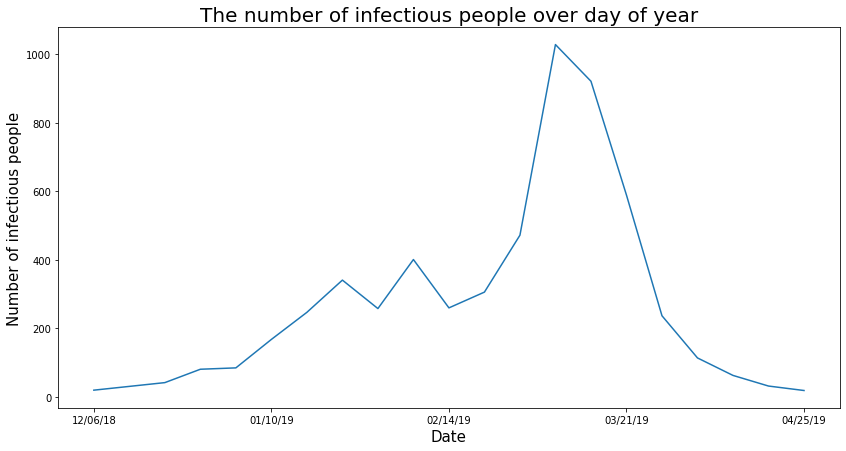

In [23]:
## Visualization of actual flu data from the Queen Anne neighbhorhood in Seattle
realdata = pd.read_csv('./data/{}/fludata.csv'.format(CITY))
plt.figure(figsize=(14,7))
plt.plot(realdata['Date'], realdata['Positive'])
plt.title('The number of infectious people over day of year', size=20)
plt.xlabel("Date", size=15)
plt.ylabel("Number of infectious people", size=15)
import matplotlib.ticker as ticker
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))

In [24]:
# Make the list of information of influenza outbreaks.
houseX=[peopleList[i].houseX for i in range(len(peopleList)) if peopleList[i].infX != None]
houseY=[peopleList[i].houseY for i in range(len(peopleList)) if peopleList[i].infY != None]

exposedX=[peopleList[i].infX for i in range(len(peopleList)) if peopleList[i].infX != None]
exposedY=[peopleList[i].infY for i in range(len(peopleList)) if peopleList[i].infY != None]
exposedT=[peopleList[i].infT for i in range(len(peopleList)) if peopleList[i].infX != None]

recoveredX=[peopleList[i].houseX for i in range(len(peopleList)) if peopleList[i].recT != None]
recoveredY=[peopleList[i].houseY for i in range(len(peopleList)) if peopleList[i].recT != None]
recoveredT=[peopleList[i].recT for i in range(len(peopleList)) if peopleList[i].recT != None]

Output file will be saved as _results.csv_

In [25]:
results = pd.DataFrame({'time':exposedT, 'xCoord':exposedX, 'yCoord':exposedY})
results.to_csv('data/{}/results.csv'.format(CITY))

In [26]:
results = pd.read_csv('data/{}/results.csv'.format(CITY))

## Make a video of infection and recovery cases.

In [27]:
xmin = 546302;
xmax = 549610;
ymin = 5274394;
ymax = 5277978;

for t in range(days):
    fig = plt.figure() # size of figure
    
    ilistX = [houseX[i] for i in range(len(exposedX)) if exposedT[i] <= t]
    ilistY = [houseY[i] for i in range(len(exposedY)) if exposedT[i] <= t]
    rlistX = [recoveredX[i] for i in range(len(recoveredX)) if recoveredT[i] <= t]
    rlistY = [recoveredY[i] for i in range(len(recoveredY)) if recoveredT[i] <= t]
    plt.scatter(houses['X'],houses['Y'], s = 0.2, c = '0.8') # drawing scatter plots of households' locations
    plt.scatter(ilistX,ilistY, s = 10, c = 'r', label ='Infectious cases')
    plt.scatter(rlistX,rlistY, s = 10, c = 'b', label ='Recovered cases')
    plt.xlabel("UTM X-Coordinates", size=15)
    plt.ylabel("UTM Y-Coordinates", size=15)
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    plt.title('Time = '+str(t)+' days, I(t) = '+str(len(ilistX)-len(rlistX)), size = 20)
    plt.axes().set_aspect('equal', 'datalim')
    plt.legend(markerscale = 2.0)
    plt.tight_layout()    
    
    fig.savefig('img/Figures/figure%d.png' % t, dpi=300)
    pylab.close(fig);
    

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


In [28]:
frames = []
    
fig = plt.figure(figsize=(15,15))
plt.xticks([])
plt.yticks([])
plt.tight_layout()    
for t in range(days):
    img = mpimg.imread('img/Figures/figure%d.png' % t) 
    frames.append([plt.imshow(img, animated=True)])

pylab.close(fig);
ani = animation.ArtistAnimation(fig, frames, interval=500, blit=False)
ani.save('img/movie.mp4')

In [63]:
import io
import base64
from IPython.display import HTML

video = io.open("img/movie.mp4", 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video width="960p" height="720p" alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))

In [110]:
import geopandas as gpd
county_geo = gpd.read_file('./data/shapefiles/qanne.geojson')
county_geo_data = county_geo.to_crs(epsg='4326').to_json()
result_data = pd.read_csv("./data/QueenAnne/results.csv")

myProj = Proj("+proj=utm +zone=10N, +north +ellps=WGS84 +datum=WGS84 +units=m +no_defs")
lonlat = myProj(result_data['xCoord'].values.tolist(), result_data['yCoord'].values.tolist(), inverse=True)
result_data['lat'] = lonlat[1]
result_data['lon'] = lonlat[0]
from folium.plugins import HeatMap
heat_data = [[row['lat'],row['lon']] for index, row in result_data.iterrows()]

heat_data_2 = [[[row['lat'],row['lon']] for index, 
              row in result_data[result_data['time'] == i].iterrows()] for i in range(0,155)]

In [113]:
from folium import plugins
m = folium.Map(location=[47.648972, -122.361579], tiles = 'cartodbpositron', zoom_start=13)


heatmap = plugins.HeatMapWithTime(heat_data_2,auto_play=True,max_opacity=1,
                                  radius = 20,
                                  name='Influenza Cases Time Series', 
                                  gradient={.6: 'PINK', .95: 'RED', 1: 'CRIMSON'})

heatmap.add_to(m)
m.save('./maps/HeatMap.html')

from IPython.display import IFrame

IFrame(src='./maps/HeatMap.html', width=900, height=1000)

<a name="RR"></a>
## 5. Contributions to Reproducibility and Replicability

* Replicability
    * Adapted original model using data obtained for different city with different population structure (different datasets and parameters)
    * Improved model through comprehensive documentation, which makes it more reproducible and replicable for future work

* Reproducibility
    * Made code more easily adaptable to other cities or areas through the use of intuitive parameter sliders and data replacement
    * Clear documentation of access, synthesis, analysis, and visualization of open data sources

<a name="future"></a>
## 6. Future Work

1. How can the contact networks be better represented?
  * Infection rate as a function of age group (specify more vulnerable age groups) and/or immunity status (based on vaccine coverage data or based on age-specific vaccine coverage)
  * Different representations of connections (e.g., hypergraph where any set of nodes can be connected to better represent household)
  * Better represent real-world scenarios with certain age groups going to different types of schools, modeling       work-from-home populations, college and university students who live and work on campuses, and factor in          additional points of contact like daycares, nursing homes, and public spaces
  * How do socioeconomic factors such as race/ethnicity or income affect the susceptibility, infectability, and recovery rates of the population?
  * Current assumption that agents move from household to nearest workplace or school, so address that using geography of city, public transportation, etc. and gravity models
  * Additionally assumes that the population is fixed (no one leaves or enters the population, no deaths or births)
2. Improve environment parameters of model
  * In addition to human agents, model schools/workplaces/households as agents with their own attributes and methods to respond to some condition (e.g., school closures due to influenza outbreak and how that impacts the results)
  * Change temporal specifications of the model (e.g., run in 8-hour increments rather than one day, after every 15 units, assume 6 units of leisure for workday versus weekend)
  * How can the natural environment be factored into the model? (e.g., atmospheric predictors such as absolute temperature and humidity)
  * Are there marginal effects? (i.e., are people living in the periphery infecting other people outside the research area?)
  * How does variation in household size impact the results? What about family and non-family household classification?
3. Do results of the simulation correspond to observation reports?
  * Results of the model supported by observed influenza data
  * Various ways to validate model that could be explored
  * Sensitivity analysis 1: mitigate mismatch between model outcomes and observations through variance-based global sensitivity analysis (GSA) to detect appropriate model specification and parameterization(Kang and Aldstadt, 2019)
  * Sensitivity analysis 2: percentage change of infections (such as single parameter, multiple parameters based on deviation and coefficients) (Guo et al, 2015)
  * Compare total number of infection cases to empirical data
  * Additional validation techniques like uncertainty analysis
  * Examine reproducibility of ABM by using statistical analyses to compare results
4. How can this model be adapted to a broader study context?
  * Empirical input data: list of households, schools, workplaces
  * Can the algorithm be applied to simulate the disease spread in other eras?
  * Can the algorithm be applied to simulate a city with a similar scale?
  * Can the algorithm be applied to a more rural area (less densely populated)?
  * Potential to look at how the model could be adapted for other diseases (changing incubation period, mode of transmission, etc.)
  
Explore future publications

<a name="ref"></a>
## 7. References

Florida Health. (2019). Florida Influenza Surveillance Reports. Accessed July 2019. http://www.floridahealth.gov/diseases-and-conditions/influenza/florida-influenza-surveillance-report-archive/index.html.

Guo, D., Li, K. C., Peters, T. R., Snively, B. M., Poehling, K. A., & Zhou, X. (2015). Multi-scale modeling for the transmission of influenza and the evaluation of interventions toward it. Scientific reports, 5, 8980. Accessed July 2019. https://www.nature.com/articles/srep08980.

Helmholtz. (2016). The ODD Protocol for describing individual-based and agent-based models. Accessed July 2019. https://www.ufz.de/export/data/2/100067_ODD_Update_template.doc.

Kang, J. Y., & Aldstadt, J. (2019). Using multiple scale space-time patterns in variance-based global sensitivity analysis for spatially explicit agent-based models. Computers, Environment and Urban Systems, 75, 170-183.

Lowen, A. C., Mubareka, S., Steel, J., & Palese, P. (2007). Influenza virus transmission is dependent on relative humidity and temperature. PLoS pathogens, 3(10), e151.

Mao, L., & Bian, L. (2010). Spatial–temporal transmission of influenza and its health risks in an urbanized area. Computers, Environment and Urban Systems, 34(3), 204-215.

QUEBS. (2013). The ODD protocol for documenting agent-based models. Accessed July 2019. https://qubeshub.org/community/groups/odd.

Seattle & King County Public Health. (2019). King County Influenza Update: May 4, 2019. Accessed July 2019. https://www.kingcounty.gov/depts/health/communicable-diseases/disease-control/~/media/depts/health/communicable-diseases/documents/influenza/2019/week-18.ashx.

Tracy, Melissa, Magdalena Cerda, and Katherine M. Keyes. (2018). Agent-Based Modeling in
Public Health: Current Applications and Future Directions. Annual Review of Public Health 39:77–94. Accessed July 2019. https://doi.org/10.1146/annurev-publhealth040617-014317.

Willem, Lander. (2015). Agent-Based Models For Infectious Disease Transmission: Exploration, Estimation & Computational Efficiency. PhD dissertation. University of Antwerp. Accessed July 2019. https://ibiostat.be/publications/phd/landerwillem.pdf.